In [1]:
import os
import pandas as pd
from tqdm.auto import tqdm
from rdkit import Chem
from rdkit.Chem import Draw
import networkx as nx
from collections import defaultdict
import numpy as np

In [2]:
import matplotlib
# matplotlib.use('Qt5Agg')
# %matplotlib qt5
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
filename = 'Task/train.csv'
df = pd.read_csv(filename)
df = df.loc[:, 'Smiles':]

In [4]:
df

,Smiles,Active
0,COc1ccc2[nH]cc(CCN)c2c1,False
1,CCCN1CCC[C@H](c2cccc(O)c2)C1.Cl,False
2,O=C(NO)c1cnc(N2CCN(S(=O)(=O)c3ccc4ccccc4c3)CC2...,False
3,Nc1cccc(CNC(=O)c2ccc(Oc3ccc(OCc4cccc(F)c4)cc3)...,False
4,Fc1ccccc1CNCc1ccc(-c2ccnc3[nH]ccc23)cc1,False
...,...,...
5552,O=C(Oc1ccc([N+](=O)[O-])cc1)N1CCC(C(O)(c2ccc3c...,False
5553,Nc1nonc1/C(=N/O)Nc1ccc(F)c(Br)c1,False
5554,Oc1cccc2cccnc12,False
5555,OC(c1ccc(-c2ccc(CN3CCN(Cc4ccncc4)CC3)cc2)c(F)c...,False


In [150]:
elements = set()
for s in df['Smiles'].tolist():
    mol = Chem.MolFromSmiles(s)
    na = {a.GetSymbol() for a in mol.GetAtoms()}
    for n in na:
         elements.add(n)

In [151]:
print(len(elements))

23


In [153]:
df[list(elements)] = np.zeros((5557, 23), dtype=float)

In [154]:
for s in range(len(df['Smiles'])):
    count_na = {}
    mol = Chem.MolFromSmiles(df['Smiles'][s])
    na = [a.GetSymbol() for a in mol.GetAtoms()]    
    for i in elements:
        df.loc[s, i] = na.count(i)

In [140]:
df["C"].unique()

array([ 28.,  16.,  10.,   9.,  25.,  22.,   7.,  30.,   8.,  11.,  17.,
        20.,  56.,  34.,  13.,  26.,  15.,  32.,   4.,  18.,  12.,  27.,
        31.,  33.,  24.,  19.,   3.,  29.,  14.,  23.,  21.,   5.,  40.,
         6.,  47.,  36.,  44.,  43.,  38.,  52.,  41.,  49.,  82.,  58.,
         0.,  37.,  46.,   2.,  45.,  42.,  57.,  35.,  78.,  59.,  64.,
       184.,  39.,  63.,  50.,  62., 172.,  51.])

In [155]:
edges = set()
for s in df['Smiles']:
    mol = Chem.MolFromSmiles(s)
    edge = [(str(b.GetBondType())) for b in mol.GetBonds()]
    for e in edge:
        edges.add(e)

In [156]:
edges

{'AROMATIC', 'DOUBLE', 'SINGLE', 'TRIPLE'}

In [158]:
df[list(edges)] = np.zeros((5557, 4), dtype=float)

In [159]:
for s in range(len(df['Smiles'])):
    mol = Chem.MolFromSmiles(df['Smiles'][s])
    edge = [(str(b.GetBondType())) for b in mol.GetBonds()]
    for e in edge:
        df.loc[s, e] = edge.count(e)

In [7]:
import pandas as pd
import numpy as np
data = pd.read_csv("Task/train_all.csv")

In [8]:
r = []
for a in data["Active"]:
    r.append(1 if a else 0)
y = pd.Series(r, copy=False)

In [12]:
X

,BertzCT,GATSm3,Chiv4pc,SPP,CATS_DA4,CATS_DA1,Tpc,CATS_DP8,Smax50,Smin48,...,value_HBA,value_HBD,value_PSA,value_ROTB,value_AROM,value_ALERTS,qed,weights_max,weights_mean,weights_none
0,2.637,0.845,0.742,0.663,0.000,0.000,1.289,0.0,0.0,0.0,...,2,2,51.04,3,2,0,0.773221,0.765483,0.773221,0.820536
1,2.532,0.032,0.968,0.801,0.000,0.000,1.349,0.0,0.0,0.0,...,2,1,23.47,3,1,0,0.894947,0.894548,0.894947,0.877186
2,3.058,1.248,3.031,0.615,0.182,0.091,2.573,0.0,0.0,0.0,...,7,2,115.73,4,3,2,0.488593,0.465940,0.488593,0.491701
3,3.089,1.197,1.115,0.742,0.200,0.000,2.863,0.0,0.0,0.0,...,5,2,86.47,8,4,1,0.369974,0.419579,0.369974,0.396698
4,2.995,1.094,1.205,0.513,0.000,0.000,1.651,0.0,0.0,0.0,...,2,2,40.71,5,4,0,0.558322,0.636613,0.558322,0.564299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5552,3.123,1.061,2.725,0.869,0.000,0.000,3.905,0.0,0.0,0.0,...,9,1,129.83,5,3,2,0.388542,0.379894,0.388542,0.351634
5553,2.778,1.052,1.041,0.739,0.250,0.083,1.842,0.0,0.0,0.0,...,6,3,109.56,2,2,4,0.337228,0.244981,0.337228,0.469045
5554,2.578,0.956,0.428,0.799,0.000,0.000,0.981,0.0,0.0,0.0,...,2,1,33.12,0,2,0,0.614103,0.610171,0.614103,0.681858
5555,3.070,0.841,2.566,0.799,0.000,0.000,2.941,0.0,0.0,0.0,...,4,1,39.60,6,3,1,0.429095,0.456986,0.429095,0.486160


In [10]:
name_col = data.columns.values
index = [0, 1, 2]
name_col = np.delete(name_col, index)

X = data[name_col]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

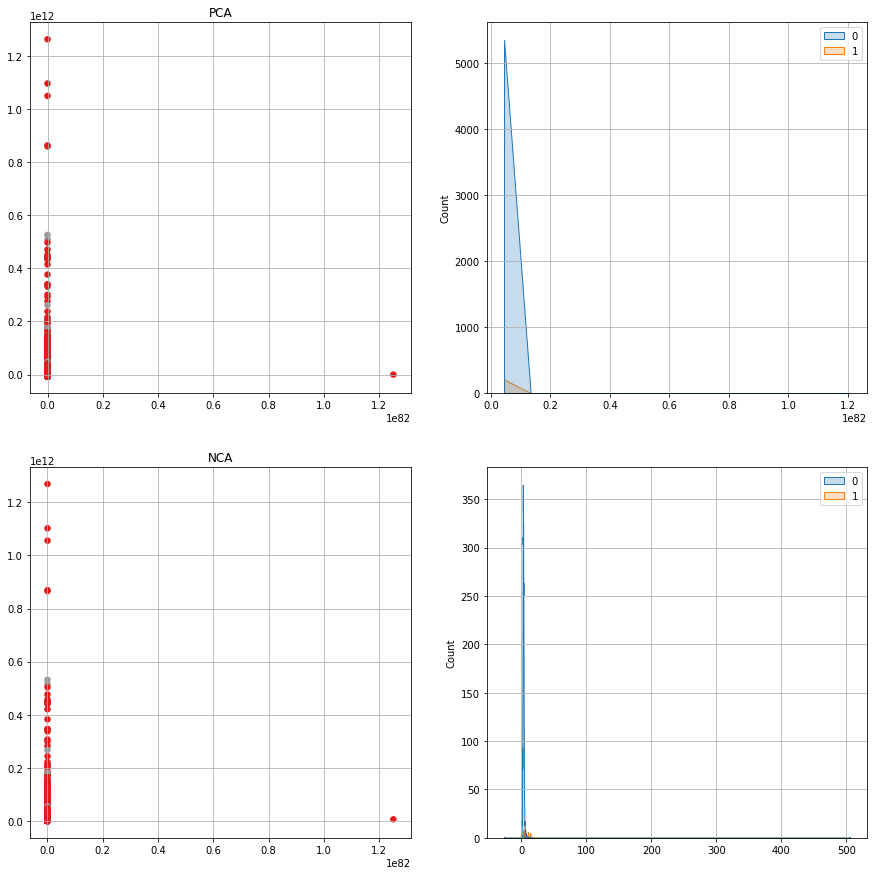

In [14]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca1 = PCA(n_components=1)
pca2 = PCA(n_components=2)

# lda1 = LinearDiscriminantAnalysis(n_components=1)
# lda2 = LinearDiscriminantAnalysis(n_components=2)

nca1 = NeighborhoodComponentsAnalysis(n_components=1)
nca2 = NeighborhoodComponentsAnalysis(n_components=2)

dim_reduction_methods = [('PCA', pca1, pca2), ('NCA', nca1, nca2)] #('LDA', lda1, lda2)]

figure, axa = plt.subplots(2,2, figsize=(15,15))
    
for i, (name, model1, model2) in enumerate(dim_reduction_methods):
    
    model1.fit(X_train, y_train)
    model2.fit(X_train, y_train)

    X_tr1 = model1.transform(X)
    X_tr2 = model2.transform(X)

    axa[i,0].scatter(X_tr2[:, 0], X_tr2[:, 1], c=y, s=30, cmap='Set1')
    sns.histplot(x=list(X_tr1.reshape(1,-1)[0]), hue=y, ax=axa[i,1], element="poly")
    axa[i,0].set_title(f"{name}")
    axa[i,0].grid()
    axa[i,1].grid()

plt.show()

In [164]:
df.to_csv("Task/train_count.csv")

In [5]:
df = pd.read_csv("Task/train_count.csv")
df = df.loc[: "Smiles":]

In [10]:
for smiles in df["Smiles"]:
    if "COON" in smiles:
        print("!\n")

In [26]:
from rdkit.Chem import AllChem

m = Chem.MolFromSmiles(df["Smiles"][1245])
m2=Chem.AddHs(m)
cids = AllChem.MMFFOptimizeMoleculeConfs(m2)

ValueError: Bad Conformer Id

In [24]:
for c in cids:
    print(c)

0
1
2
3
4
5
6
7
8
9
